In [1]:
import torch as t
from torch.autograd import Variable as V
%matplotlib inline
from matplotlib import pyplot as plt
from IPython import display 
import numpy as np


In [2]:
# 设置随机数种子，为了在不同人电脑上运行时下面的输出一致
t.manual_seed(100) 

def get_fake_data(batch_size=8):
    ''' 产生随机数据：y = x*2 + 3，加上了一些噪声'''
    x = t.rand(batch_size,1) * 5
    y = x * 2 + 3 + t.randn(batch_size, 1)
    return x, y


In [3]:
#随机初始化参数
w = V(t.rand(1,1),requires_grad = True)
b = V(t.rand(1,1),requires_grad = True)
lr = 0.001


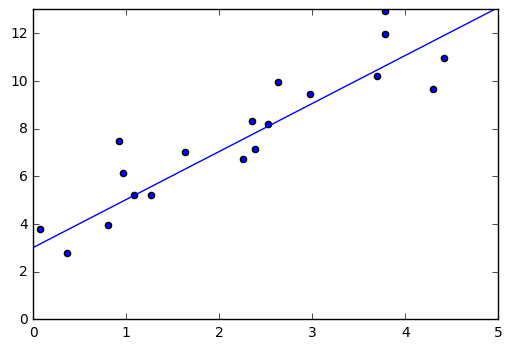

1.9947055578231812 3.0161163806915283


In [4]:
for ii in range(8000):
    x, y = get_fake_data()
    x,y = V(x),V(y)
    
    #forward 计算loss
    y_pred = x.mm(w) + b.expand_as(y)
    loss = 0.5 * (y_pred - y) ** 2
    loss = loss.sum()
    
    #backward:自动计算梯度
    loss.backward()
    
    #更新参数
    w.data.sub_(lr * w.grad.data)
    b.data.sub_(lr * b.grad.data)
    
    #梯度清0
    w.grad.data.zero_()
    b.grad.data.zero_()
    
    if ii%50 ==0:
        # 画图
        display.clear_output(wait=True)
        x = t.arange(0, 6).view(-1, 1)
        y = x.float().mm(w.data) + b.data.expand_as(x)
        plt.plot(x.numpy(), y.numpy()) # predicted
        
        x2, y2 = get_fake_data(batch_size=20) 
        plt.scatter(x2.numpy(), y2.numpy()) # true data
        
        plt.xlim(0,5)
        plt.ylim(0,13)   
        plt.show()
        plt.pause(0.5)
        
print(w.item(), b.item())